Simple example to demonstrate the effect of forcing in the mode-locking regions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2015/2015 done!
2015/2015 done!


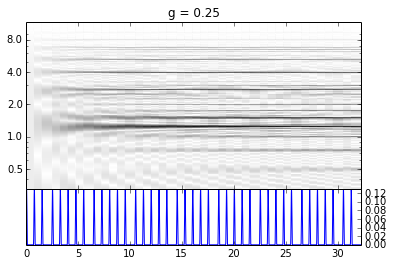

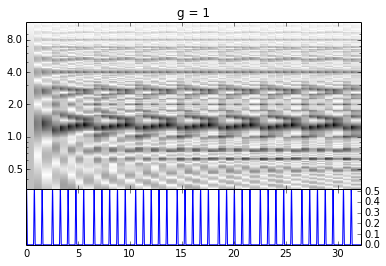

In [58]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np

import matplotlib.pyplot as plt

from pygrfnn import GrFNN, Zparam
from pygrfnn.network import Model
from pygrfnn.vis import tf_simple

from daspy import Signal
from daspy.processing import onset_detection_signal
from pyrhythm.library import get_pattern


P = get_pattern('Bossa')

sr = 16000.0

hop_size = 256
x,_ = P.as_signal(sr=sr, reps=8, tempo=60)
x = Signal(x, sr=sr)
x = x.normalize()*10/hop_size  # empirical relationship
t = np.linspace(0,len(x)/sr,len(x))


s = onset_detection_signal(x, hop_size=hop_size, win_len=4096)
ts = np.linspace(0,len(s)/s.sr,len(s))

# plt.plot(ts,s)

zp = Zparam(alpha=0.0001, beta1=-2, beta2=0)
g = GrFNN(zp, 
          z0=0,
          w=1,
          frequency_range=(0.325, 12), 
          num_oscs=200, 
          stimulus_conn_type='allfreq')
m = Model()
m.add_layer(g, input_channel=0)


z0 = [g.z.copy() for g in m.layers()]    # reset states
output_dir = '/Users/jorgeh/Documents/CCRMA/research/ismir2015/frameworkPaper/figs/effectOfForcing'

for gain in [0.25, 1]:

    # reset
    for z, l in zip(z0, m.layers()):
        l.z = z.copy()    
    
    # run it
    m.run(gain*s, ts, 1/s.sr)

    # show TFR
    tf_simple(np.abs(g.Z), ts, g.f, x=gain*s, title="g = {}".format(gain), 
              cmap='binary',
#               vmin=0, 
#               vmax=0.2
             )
    
    # NOTE: tikz_save can't handle the color bar, so if you uncomment this, you'll need to go to the source code
    # in pygrfnn.vis and comment out the line lines `cb = plt.colorbar(im, ax=axTF, cax=axCB)` and 
    # `cb.ax.yaxis.set_ticks_position('left')`
#     tikz_save('{}/{}.tikz'.format(output_dir



In [30]:
onset_detection_signal?